# Exports Classification


![](ex2.jpg)

### Contents

1. Abstract
2. Goal
3. Dataset
4. Required Libraries
5. Plotting the year v/s capita curve for the dataset
6. Regression Model Creation
    - Spliting the dataset into 75:25 ratio
    - Deploying the models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Lasso Regression
        - Ridge Regression
        - MLP Regression
        - XgBoost Regression
        - Gradient Boosting Regression
        - Support Vector Regression
7. Comparing the accuracy of the models
8. Conclusion

### Abstract
Canadian exports of goods and services combined reached $729 billion in 2019, up 2.2% goods exports alone were up 1.7%, while services exports were up 4.4%. This overall growth in goods and services exports was weak compared to the last decade when goods and services exports grew annually on average 4.6%. Although services exports account for 18% of Canadian exports, they averaged 5.7% annual growth between 2010 and 2019, outpacing the 4.4% annual growth in goods exports, which account for the much larger share (82%) of Canadian exports. Growth in services exports has also been less volatile than growth in goods exports: annual growth for services exports ranged between 1.4% and 6.9% during the decade while for goods exports it ranged between -1.0% and 13%.

Now using the dataset I am going to create a classification model, which can predict the capita of export with respect to the years.

### Goal
The goal of this project is to build a classification model, using regression algorithms, such as, linear regression, random forest regression, decision tree regressor and many more algorithms. After that the models are going to be evaluated using the accuracy scores.

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/balakrishcodes/others?select=canada_per_capita.csv

### Importing required libraries and dataset

In [53]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [54]:
# Loading Data
data = pd.read_csv('canada_per_capita.csv')
data.head()

,year,per capita income (US$),Unnamed: 2
0,1970,3399.299037,NaN
1,1971,3768.297935,NaN
2,1972,4251.175484,NaN
3,1973,4804.463248,NaN
4,1974,5576.514583,NaN


In [55]:
data.corr()

,year,per capita income (US$),Unnamed: 2
year,1.000000,0.943884,NaN
per capita income (US$),0.943884,1.000000,NaN
Unnamed: 2,NaN,NaN,NaN


**Data cleaning and pre-processing**

In [56]:
data.columns

Index(['year', 'per capita income (US$)', 'Unnamed: 2'], dtype='object')

In [57]:
data.drop(columns=['Unnamed: 2'], inplace = True)

In [58]:
data.rename(columns={"per capita income (US$)": "capita"}, inplace = True)

In [59]:
data.columns

Index(['year', 'capita'], dtype='object')

### Plotting the Year v/s Capita Curve for the dataset

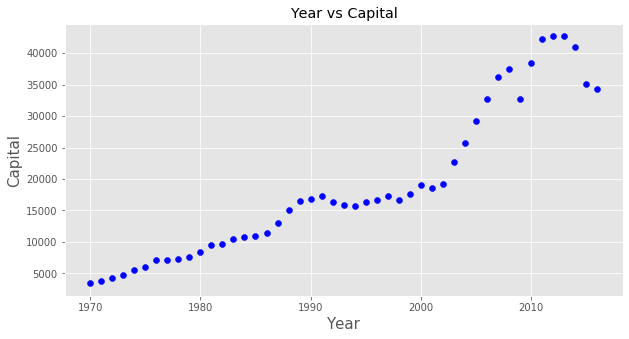

In [97]:
plt.figure(figsize=(10,5))

plt.title('Year vs Capital')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capital', fontsize=15)
plt.scatter(data.year, data.capita, color='blue')
plt.show()

In [61]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [62]:
X.shape

(47, 1)

##   Regression Model Creation
Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with nine regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


* **MLP Regressor** : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


* **Gradient Boosting Regressor** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **Support Vector Machine Regressor** : Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

Let's deploy the models...


**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (35, 1)
X_test: (12, 1)
y_train: (35,)
y_test: (12,)


### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [64]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

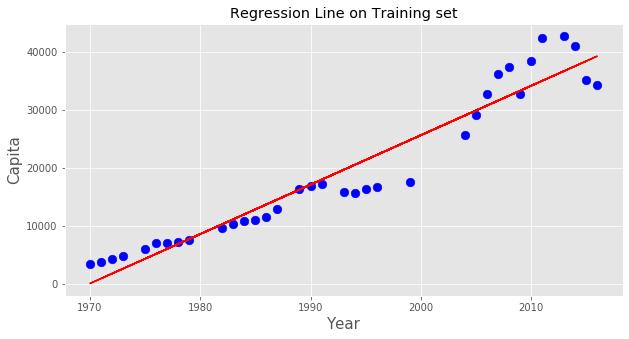

In [69]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, regr.predict(X_train), color='red')
plt.show()

In [70]:
y_pred = np.round(regr.predict(X_test), decimals=2)
pd.DataFrame({'Height': X_test[:,0], 'Actual Weight': y_test, 'Predicted Weight': y_pred})

,Height,Actual Weight,Predicted Weight
0,1998,16622.671870,23927.34
1,2003,22739.426280,28184.79
2,2000,18987.382410,25630.32
3,1974,5576.514583,3491.57
4,1988,15080.283450,15412.43
5,1981,9434.390652,9452.00
6,2012,42665.255970,35848.21
7,2001,18601.397240,26481.81
8,1992,16412.083090,18818.40
9,1980,8355.968120,8600.51


In [71]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4420.1836775833335
Residual Sum of Squares(MSE): 28740341.3635021
R2-Score: 0.6428891732074771


### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

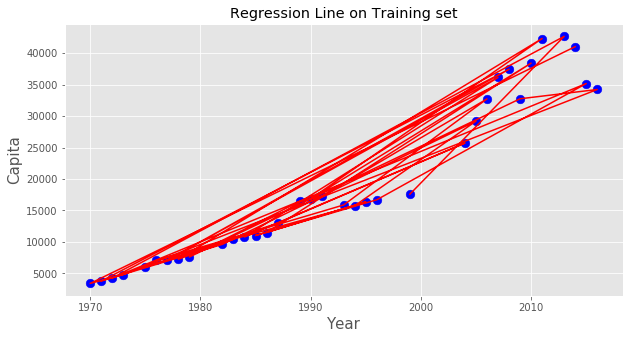

In [73]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, dtr.predict(X_train), color='red')
plt.show()

In [74]:
y_pred = np.round(dtr.predict(X_test), decimals=2)

In [75]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1538.576005916667
Residual Sum of Squares(MSE): 5144942.639069844
R2-Score: 0.9360719242544705


### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

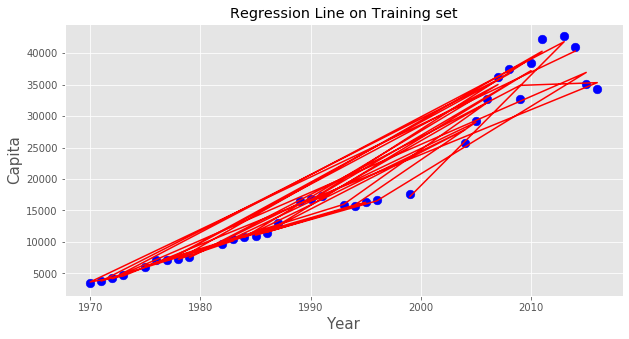

In [77]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, rfr.predict(X_train), color='red')
plt.show()

In [78]:
y_pred = np.round(rfr.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1420.9607412500006
Residual Sum of Squares(MSE): 4236992.864692713
R2-Score: 0.9473535819951701


### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [79]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

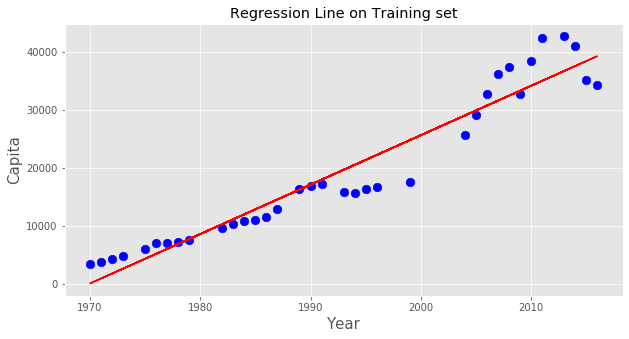

In [80]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, lasso.predict(X_train), color='red')
plt.show()

In [81]:
y_pred = np.round(lasso.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4420.186177583334
Residual Sum of Squares(MSE): 28740350.24087571
R2-Score: 0.6428890629023769


### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [82]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

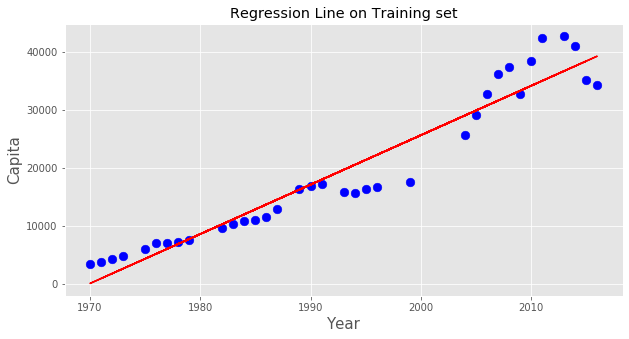

In [83]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, ridge.predict(X_train), color='red')
plt.show()

In [84]:
y_pred = np.round(ridge.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4420.169510916666
Residual Sum of Squares(MSE): 28739926.596719485
R2-Score: 0.6428943268591609


### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [98]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[16:25:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

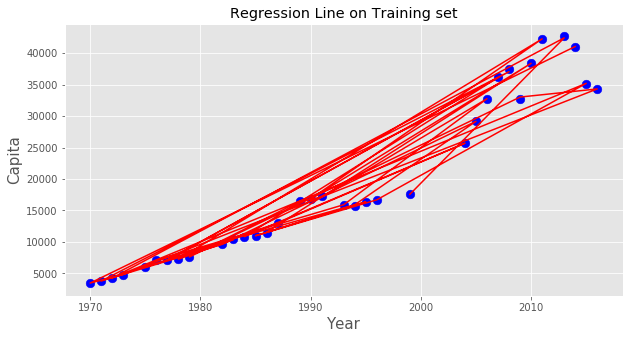

In [86]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, xgb.predict(X_train), color='red')
plt.show()

In [87]:
y_pred = np.round(xgb.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1408.394885859375
Residual Sum of Squares(MSE): 4816799.568394187
R2-Score: 0.9401492398922046


### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [88]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor()

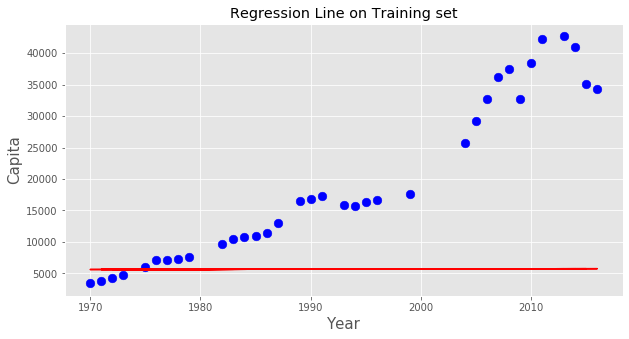

In [89]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, mlp.predict(X_train), color='red')
plt.show()

In [90]:
y_pred = np.round(mlp.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 11909.93565075
Residual Sum of Squares(MSE): 221648624.555403
R2-Score: -1.75407736363645


### Gradient Boosting Regressor 
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

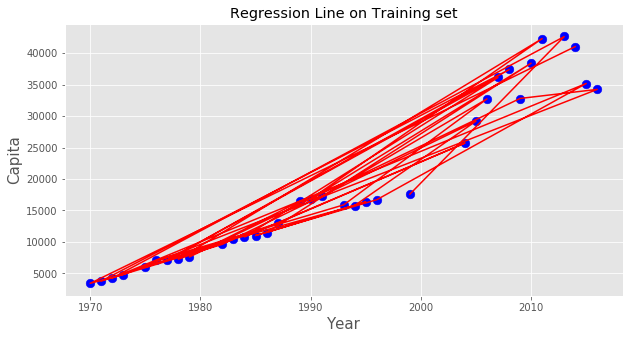

In [92]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, gb.predict(X_train), color='red')
plt.show()

In [93]:
y_pred = np.round(gb.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1534.3551725833331
Residual Sum of Squares(MSE): 5132058.753013979
R2-Score: 0.9362320119564055


### Support Vector Machine Regressor 
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [94]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

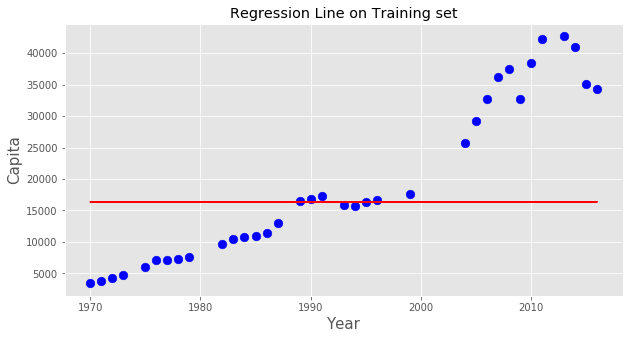

In [95]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training set')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Capita', fontsize=15)
plt.scatter(X_train, y_train,s=75, color='blue')
plt.plot(X_train, svm.predict(X_train), color='red')
plt.show()

In [96]:
y_pred = np.round(svm.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 5713.57861375
Residual Sum of Squares(MSE): 81842468.93126841
R2-Score: -0.01692709133588588


**********

<a id="conclusion"></a>
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|0.64|
|Decision Tree Regressor|0.94|
|Random Forest Regressor|0.95|
|Lasso Regression|0.64|
|Ridge Regression|0.64|
|XgBoost Regressor|0.94|
|MLP Regressor|-1.75|
|Gradient Boosting Regressor|0.94|
|Support Vector Regressor|-0.02|

### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Random Forest Regressor is having the upper hand in case of this dataset and after this, we can use Decision Tree, XgBoost and Gradient Boosting, which are also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Random Forest Regressor
2. Decision Tree Regressor
3. Gradient Boosting
4. XgBoost
5. Lasso
6. Ridge
7. Linear regression
8. Support Vector regressor
9. MLP regressor


Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!